# Data Preprocessing

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
edu_data = pd.read_csv('Datasets/2015_16_Districtwise_education.csv')

In [4]:
edu_data.head()

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209


In [5]:
edu_data['STATNAME'] = edu_data['STATNAME'].str.lower()
edu_data['DISTNAME'] = edu_data['DISTNAME'].str.lower()

In [6]:
edu_df = edu_data[['STATNAME','DISTNAME','BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT', 'P_URB_POP', 'GROWTHRATE','SEXRATIO' ,'OVERALL_LI','FEMALE_LIT','MALE_LIT','AREA_SQKM']]

In [7]:
edu_df=edu_df.rename(columns={'STATE':'State','DISTNAME':'District','BLOCKS':'Blocks','VILLAGES':'Villages','CLUSTERS':'Clusters','TOTPOPULAT':'Total_population','P_URB_POP':'Urban_population','GROWTHRATE':'Growth_rate','SEXRATIO':'Sex_ratio','OVERALL_LI':'Overall_literacy','FEMALE_LIT':'Female_lit','MALE_LIT':'Male_lit','AREA_SQKM':'Area_sqkm'})

In [8]:
edu_df.dtypes

STATNAME             object
District             object
Blocks                int64
Villages              int64
Clusters              int64
Total_population    float64
Urban_population    float64
Growth_rate         float64
Sex_ratio           float64
Overall_literacy    float64
Female_lit          float64
Male_lit            float64
Area_sqkm           float64
dtype: object

In [9]:
edu_df.head(5)

,STATNAME,District,Blocks,Villages,Clusters,Total_population,Urban_population,Growth_rate,Sex_ratio,Overall_literacy,Female_lit,Male_lit,Area_sqkm
0,jammu & kashmir,kupwara,13,391,104,875564.0,11.33,34.62,843.0,66.92,54.79,77.10,2379.0
1,jammu & kashmir,baramula,18,678,144,1015503.0,17.19,20.34,873.0,66.93,55.01,77.35,4243.0
2,jammu & kashmir,srinagar,8,94,65,1269751.0,98.73,23.56,879.0,71.21,63.47,77.95,1979.0
3,jammu & kashmir,badgam,13,523,104,735753.0,11.74,21.18,883.0,57.98,46.60,68.56,1361.0
4,jammu & kashmir,pulwama,8,359,64,570060.0,13.80,29.18,913.0,65.00,53.81,75.41,1086.0


In [10]:
edu_data.shape

(680, 819)

In [11]:
cri_data=pd.read_csv('Datasets/01_District_wise_crimes_committed_IPC_2014.csv')

In [12]:
cri_data.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [13]:
new_data = pd.DataFrame()
Merge_data = pd.DataFrame()

In [14]:
new_data['STATE'] = cri_data['States/UTs']
new_data['DISTNAME'] = cri_data['District']
new_data['Murder'] = cri_data.Murder + cri_data['Attempt to commit Murder']+cri_data['Culpable Homicide not amounting to Murder']+cri_data['Attempt to commit Culpable Homicide']
new_data['Rape'] = cri_data.Rape + cri_data['Custodial Rape'] + cri_data['Custodial_Gang Rape'] + cri_data['Custodial_Other Rape'] + cri_data['Rape other than Custodial'] + cri_data['Rape_Gang Rape'] + cri_data['Rape_Others'] + cri_data['Attempt to commit Rape']
new_data['Kidnap'] = cri_data['Kidnapping & Abduction_Total'] 
new_data['Dacoity/theft'] = cri_data['Dacoity'] + cri_data['Criminal Trespass/Burglary'] + cri_data['Theft'] + cri_data['Robbery']
new_data['Fraud'] = cri_data['Cheating'] + cri_data['Forgery'] + cri_data['Counterfeiting currency notes/Bank notes']
new_data['Riots'] = cri_data['Riots'] + cri_data['Unlawful Assembly']
new_data['injury'] = cri_data['Grievous Hurt'] + cri_data['Arson']
new_data['Sexual_harassment'] = cri_data['Assault on Women with intent to outrage her Modesty'] +  cri_data['Dowry Deaths'] + cri_data['Insult to the Modesty of Women'] + cri_data['Cruelty by Husband or his Relatives'] + cri_data['Importation of Girls from Foreign Country']
new_data['Death_by_negligence'] = cri_data['Causing Death by Negligence'] + cri_data['Incidence of Rash Driving']
new_data['Offences_against_state'] = cri_data['Offences against State'] + cri_data['Offences promoting enmity between different groups'] + cri_data['Extortion']
new_data['unnatural'] = cri_data['HumanTrafficking'] + cri_data['Unnatural Offence']
new_data['other_crimes'] = cri_data['Other IPC crimes']
new_data['Total_crimes'] = new_data['Murder'] + new_data['Rape'] + new_data['Kidnap'] + new_data['Dacoity/theft'] + new_data['Fraud'] + new_data['Riots'] + new_data['injury'] + new_data['Sexual_harassment'] + new_data['Death_by_negligence'] + new_data['Offences_against_state'] + new_data['unnatural'] + new_data['other_crimes'] 


In [15]:
new_data = new_data[['STATE', 'DISTNAME', 'Murder'
,'Rape'
,'Kidnap'
,'Dacoity/theft'
,'Riots'
,'Fraud'        
,'injury'           
,'unnatural'             
,'Total_crimes'            
,'Sexual_harassment'        
,'Death_by_negligence','Offences_against_state','other_crimes']]

In [16]:
new_data = new_data.rename(columns={'STATE':'State','DISTNAME':'District'})

In [17]:
new_data.dtypes

State                     object
District                  object
Murder                     int64
Rape                       int64
Kidnap                     int64
Dacoity/theft              int64
Riots                      int64
Fraud                      int64
injury                     int64
unnatural                  int64
Total_crimes               int64
Sexual_harassment          int64
Death_by_negligence        int64
Offences_against_state     int64
other_crimes               int64
dtype: object

In [18]:
new_data['State'] = new_data['State'].str.lower()
new_data['District'] = new_data['District'].str.lower()

In [19]:
new_data.head()

,State,District,Murder,Rape,Kidnap,Dacoity/theft,Riots,Fraud,injury,unnatural,Total_crimes,Sexual_harassment,Death_by_negligence,Offences_against_state,other_crimes
0,andhra pradesh,anantapur,313,106,125,1204,214,306,37,0,8433,652,1676,0,3800
1,andhra pradesh,chittoor,256,96,38,757,134,207,41,0,5426,524,787,19,2567
2,andhra pradesh,cuddapah,243,88,27,801,104,168,39,0,5773,334,1365,0,2604
3,andhra pradesh,east godavari,150,273,66,1276,27,214,94,0,7682,1052,707,32,3791
4,andhra pradesh,guntakal railway,18,0,0,419,1,5,0,0,485,0,5,0,37


In [24]:
new_data.shape

(838, 15)

In [20]:
merge_data = pd.merge(new_data,edu_df, on='District', how='inner')

In [37]:
import seaborn as sn
%matplotlib inline
corr_matrix = merge_data.corr()

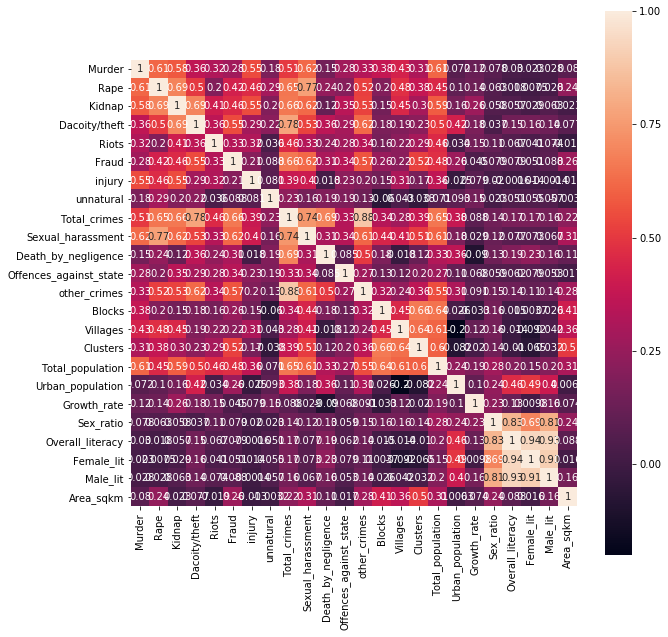

In [38]:
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sn.heatmap(corr_matrix, annot = True, square = True)

In [27]:
merge_data.dtypes

State                      object
District                   object
Murder                      int64
Rape                        int64
Kidnap                      int64
Dacoity/theft               int64
Riots                       int64
Fraud                       int64
injury                      int64
unnatural                   int64
Total_crimes                int64
Sexual_harassment           int64
Death_by_negligence         int64
Offences_against_state      int64
other_crimes                int64
Blocks                      int64
Villages                    int64
Clusters                    int64
Total_population          float64
Urban_population          float64
Growth_rate               float64
Sex_ratio                 float64
Overall_literacy          float64
Female_lit                float64
Male_lit                  float64
Area_sqkm                 float64
dtype: object

In [26]:
del merge_data['STATNAME']

In [31]:
merge_data.isnull().values.any()

False

In [33]:
submission = pd.DataFrame(merge_data).to_csv('final_predictions1.csv', index=False)

In [30]:
merge_data.fillna(0, inplace=True)